In [1]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 1, 28, 28))
x_test = np.reshape(x_test, (len(x_test), 1, 28, 28))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

Using Theano backend.
Using gpu device 0: GeForce GTX 1080 (CNMeM is enabled with initial size: 80.0% of memory, cuDNN 5105)


In [2]:
import matplotlib.pyplot as plt

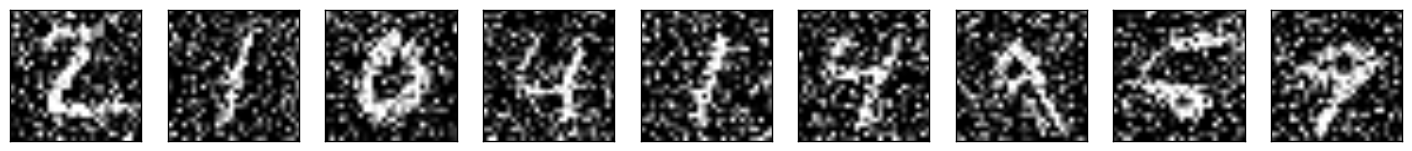

In [3]:

n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    if(i!=0):
        ax = plt.subplot(1, n, i)
        plt.imshow(x_test_noisy[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
plt.show()

In [4]:
from keras.layers import Input, Dense, Convolution2D, MaxPooling2D, UpSampling2D
from keras.models import Model

input_img = Input(shape=(1, 28, 28))

x = Convolution2D(32, 3, 3, activation='relu', border_mode='same')(input_img)
x = MaxPooling2D((2, 2), border_mode='same')(x)
x = Convolution2D(32, 3, 3, activation='relu', border_mode='same')(x)
encoded = MaxPooling2D((2, 2), border_mode='same')(x)

# at this point the representation is (32, 7, 7)

x = Convolution2D(32, 3, 3, activation='relu', border_mode='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Convolution2D(32, 3, 3, activation='relu', border_mode='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Convolution2D(1, 3, 3, activation='sigmoid', border_mode='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [9]:
autoencoder.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 1, 28, 28)     0                                            
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 32, 28, 28)    320         input_1[0][0]                    
____________________________________________________________________________________________________
maxpooling2d_1 (MaxPooling2D)    (None, 32, 14, 14)    0           convolution2d_1[0][0]            
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 32, 14, 14)    9248        maxpooling2d_1[0][0]             
___________________________________________________________________________________________

In [5]:
autoencoder.fit(x_train_noisy, x_train,
                nb_epoch=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 5s - loss: 0.2013 - val_loss: 0.1339
Epoch 2/100
60000/60000 [==============================] - 5s - loss: 0.1264 - val_loss: 0.1204
Epoch 3/100
60000/60000 [==============================] - 5s - loss: 0.1171 - val_loss: 0.1130
Epoch 4/100
60000/60000 [==============================] - 5s - loss: 0.1122 - val_loss: 0.1086
Epoch 5/100
60000/60000 [==============================] - 5s - loss: 0.1093 - val_loss: 0.1071
Epoch 6/100
60000/60000 [==============================] - 5s - loss: 0.1072 - val_loss: 0.1046
Epoch 7/100
60000/60000 [==============================] - 5s - loss: 0.1061 - val_loss: 0.1054
Epoch 8/100
60000/60000 [==============================] - 5s - loss: 0.1049 - val_loss: 0.1034
Epoch 9/100
60000/60000 [==============================] - 5s - loss: 0.1040 - val_loss: 0.1024
Epoch 10/100
60000/60000 [==============================] - 5s - loss: 0.1032 - val_lo

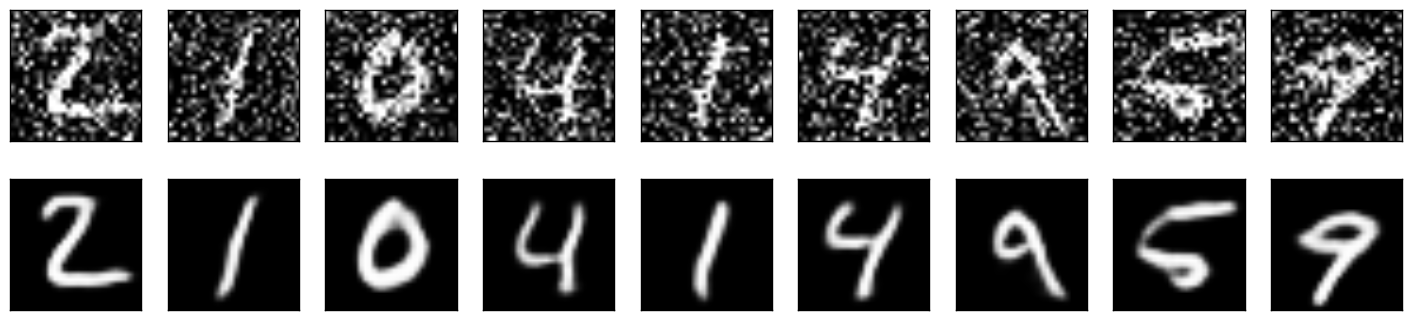

In [15]:
import matplotlib.pyplot as plt
decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    if(i!=0):
        ax = plt.subplot(2, n, i)
        plt.imshow(x_test_noisy[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display reconstruction
        ax = plt.subplot(2, n, i + n)
        plt.imshow(decoded_imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
plt.show()